In [ ]:
#importing
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
df = pd.read_csv('mental_health_tech.csv', index_col=0)
df.head()

,Self Employed,Total Employees,Tech/No Tech,MH Benefits,Awareness of Company MH Care,Formal MH Discussion,MH Resources,Anonymity,Medical Leave,MH Negative Impact,...,Sharing w/ Family/Friends,Prev Observed Unsupportive Response,Less Likely to Reveal,MH Family History,Sought Treatment,Age,Gender,Country,State,Remote
0,0,3,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,...,Somewhat open,No,NaN,No,0,4,1.0,2,0,Sometimes
1,0,2,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Somewhat open,No,NaN,Yes,1,3,1.0,1,2,Never
2,0,2,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,Somewhat open,Maybe/Not sure,Yes,No,1,4,1.0,2,0,Always
4,0,2,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Somewhat open,"Yes, I experienced",Yes,Yes,1,4,2.0,1,2,Sometimes
5,0,6,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,Somewhat open,"Yes, I experienced",No,No,1,4,1.0,2,0,Sometimes


In [ ]:
df = df[['Age', 'Gender', 'MH Family History', 'Sought Treatment', 'Prev Awareness of Company MH Care', "Remote", "Country", "State", "Tech/No Tech", "Total Employees", "MH Benefits", "MH Resources", "Medical Leave"]]

In [ ]:
d = {'Column Name': df.columns, 'Unique Values': df.nunique()}
unique_vals = pd.DataFrame(data=d).reset_index()[['Column Name', 'Unique Values']].sort_values(by='Unique Values', ascending=False)

# Selecting only column names that have a valid number of unique values for dummy variable transformation (filter out binary and large numbers of unique values)
valid_dummy = unique_vals[(unique_vals['Unique Values']!=2) & (unique_vals['Unique Values']!=53) & (unique_vals['Unique Values']!=48)]
dummy_list = valid_dummy['Column Name'].values
dummy_list

array(['Country', 'Total Employees', 'Medical Leave', 'Age', 'State',
       'Prev Awareness of Company MH Care', 'MH Benefits', 'Gender',
       'MH Family History', 'Remote', 'MH Resources'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=dummy_list)
df.head()

,Sought Treatment,Tech/No Tech,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Total Employees_1,...,Gender_3.0,MH Family History_I don't know,MH Family History_No,MH Family History_Yes,Remote_Always,Remote_Never,Remote_Sometimes,MH Resources_I don't know,MH Resources_No,MH Resources_Yes
0,0,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,1,1.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,1,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,1,0.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
5,1,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
# Making binary columns within the data frame consistent

# df.loc[df['Observed Negative Impact'] == 'Yes', 'Observed Negative Impact'] = 1
# df.loc[df['Observed Negative Impact'] == 'No', 'Observed Negative Impact'] = 0


df.loc[df['Tech/No Tech'] == 1.0, 'Tech/No Tech'] = 'Yes'
df.loc[df['Tech/No Tech'] == 0.0, 'Tech/No Tech'] = 'No'

df.loc[df['Tech/No Tech'] == 'Yes', 'Tech/No Tech'] = 1
df.loc[df['Tech/No Tech'] == 'No', 'Tech/No Tech'] = 0

In [ ]:
features = df.drop(['Sought Treatment'], axis=1)
target = df['Sought Treatment']

#cross validation
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.30)

In [ ]:
#random forest modelling

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)
forest.fit(X_train, Y_train)
print(accuracy_score(forest.predict(X_val), Y_val))

0.7376093294460642


# Random Forests Confusion Matrix

[[ 96  53]
 [ 37 157]]


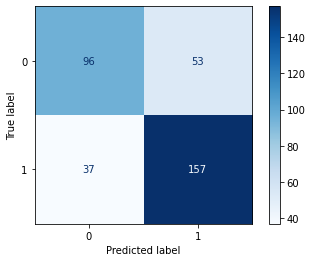

In [ ]:
CM = confusion_matrix(Y_val, forest.predict(X_val))
print(CM)

plot_confusion_matrix(forest, X_val, Y_val, cmap=plt.cm.Blues)
plt.show()

In [ ]:
TP = CM[1][1]
TN = CM[0][0]
FP = CM[0][1]
FN = CM[1][0]

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 157
True Negatives: 96
False Positives: 53
False Negatives: 37


In [ ]:
P = TP + FP
N = TN + FN

accuracy = (TP + TN) / (P + N)
error_rate = (FP + FN) / (P + N)
recall = TP / P
specificity = TN / N
precision = TP / (TP + FP)
F_score = (2 * precision * recall) / (precision + recall)
FNR = FN / (FN + TP)

measures = ["Accuracy", "Error / Misclassification Rate", "Recall / Sensitivity (True Positive Rate)", "Specificity (True Negative Rate)", "Precision", "F/F1/F-score", "False Negative Rate"]
vals = [accuracy, error_rate, recall, specificity, precision, F_score, FNR]

d = {"Measures": measures, "Values": vals}

CM_df = pd.DataFrame(data = d)
CM_df

,Measures,Values
0,Accuracy,0.737609
1,Error / Misclassification Rate,0.262391
2,Recall / Sensitivity (True Positive Rate),0.747619
3,Specificity (True Negative Rate),0.721805
4,Precision,0.747619
5,F/F1/F-score,0.747619
6,False Negative Rate,0.190722


Accuracy 0.7376093294460642


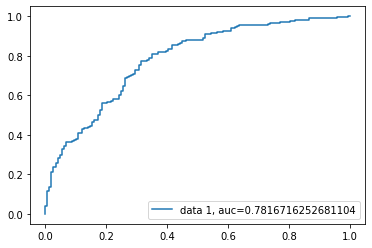

In [ ]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(Y_val, forest.predict(X_val)))
y_pred_proba = forest.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_val,  y_pred_proba)
auc = metrics.roc_auc_score(Y_val, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

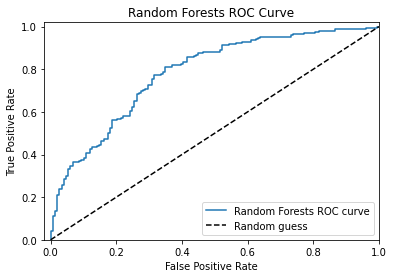

In [ ]:
y_pred_prob = forest.predict_proba(X_val)[:,1]

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(Y_val, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='Random Forests ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Random Forests ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=387b3f34-ad6b-4fed-8016-3e4e46161261' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>